## Barcelona geojson files:

On the way to wondering how to create a map of the middle kingdom for Islamic history I also got thinking about creating a personalized Barcelona map. Turns out there are compete geojson files for Barca which are in the included folder.

This [website](https://docs.astraea.earth/hc/en-us/articles/360043919911-Read-a-GeoJSON-File-into-a-GeoPandas-DataFrame) offers some guidance for reading such files into a geopandas data frame. Let's see if it works.

[Geopandas Reference:](https://geopandas.org/en/stable/index.html)

In [1]:
import geopandas as gpd
import geoplot as gp
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter
from IPython.display import display, Image
from shapely.geometry import Point

### Global Geopandas Data Sources

The datasets given below are broadly available for general use. Seems potentially useful for drawing low res maps of the world.

In [2]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

### Barcelona Geojson Data Sets

The bcn-geodata contains a multitude of geographic data sets in geojson format. The 2020 data was imported from [this github](https://github.com/martgnz/bcn-geodata). 

A range of other data is available on the [Barcelona municipal open data site](https://opendata-ajuntament.barcelona.cat/en/) which seems like an AWESOME resource. This is the [mapping article](https://diegoquintanav.github.io/folium-barcelona-EN.html) that got me turned on to the data. Need to explore more for sure.

I had some difficulty understanding what was inside the .geojson file so I opened it to take a look. The screen shot below gives a sense. Notice the 'NOM' field which has the name of the barri which I wanted. On the other hand it doesn't show in the 

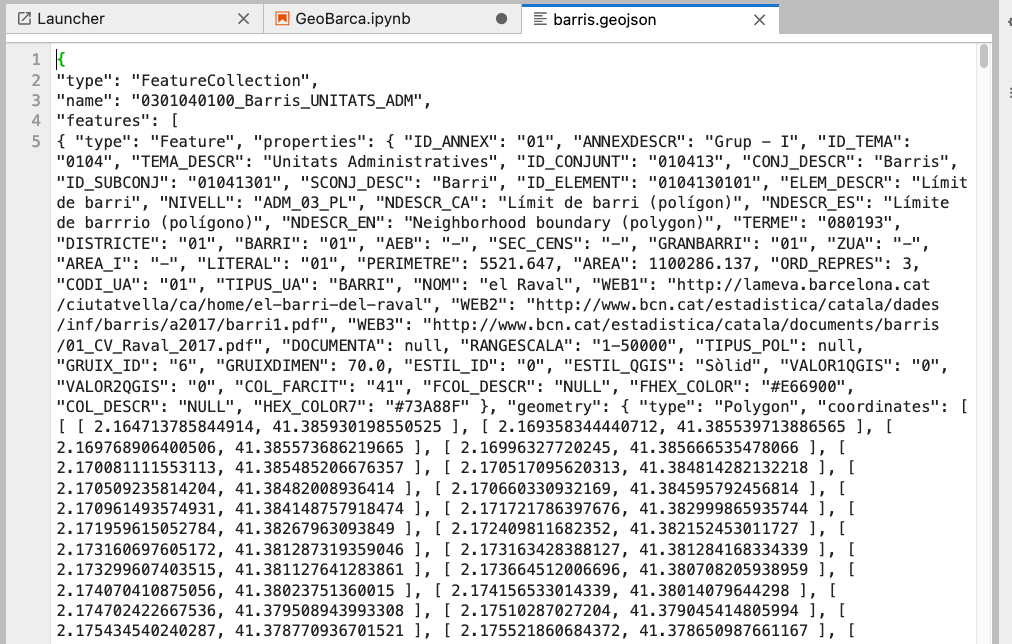

In [11]:
Image('images/barcaGeojsonFormat.png')

Next two cells read some data in from the database and then print out the .crs (coordinate reference systems) for the dataframe and the type of dataframe to be sure everything is on track.

In [3]:
barcaDFdistrictes = gpd.read_file("bcn-geodata/districtes/districtes.geojson")
barcaDFbarris = gpd.read_file("bcn-geodata/barris/barris.geojson")
barcaDFcensal = gpd.read_file("bcn-geodata/seccio-censal/seccio-censal.geojson")

In [4]:
print("Districts: \n",(barcaDFdistrictes.crs,type(barcaDFdistrictes)))
print("\n Barri: \n", (barcaDFbarris.crs,type(barcaDFbarris)))
print("\n censal: \n", (barcaDFcensal.crs, type(barcaDFcensal)))


Districts: 
 (<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
, <class 'geopandas.geodataframe.GeoDataFrame'>)

 Barri: 
 (<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
, <class 'geopandas.geodataframe.GeoDataFrame'>)

 censal: 
 (<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: W

### Display the Dataframe

I often forget whats in these data frames so it's helpful sometimes to roll it out to see what the formatting is. 

In [5]:
barcaDFbarris.keys

<bound method NDFrame.keys of    ID_ANNEX ANNEXDESCR ID_TEMA               TEMA_DESCR ID_CONJUNT CONJ_DESCR  \
0        01   Grup - I    0104  Unitats Administratives     010413     Barris   
1        01   Grup - I    0104  Unitats Administratives     010413     Barris   
2        01   Grup - I    0104  Unitats Administratives     010413     Barris   
3        01   Grup - I    0104  Unitats Administratives     010413     Barris   
4        01   Grup - I    0104  Unitats Administratives     010413     Barris   
..      ...        ...     ...                      ...        ...        ...   
68       01   Grup - I    0104  Unitats Administratives     010413     Barris   
69       01   Grup - I    0104  Unitats Administratives     010413     Barris   
70       01   Grup - I    0104  Unitats Administratives     010413     Barris   
71       01   Grup - I    0104  Unitats Administratives     010413     Barris   
72       01   Grup - I    0104  Unitats Administratives     010413     Barris  

In [6]:
barcaDFbarris["NOM"]

0                            el Raval
1                      el Barri Gòtic
2                      la Barceloneta
3              la Dreta de l'Eixample
4     l'Antiga Esquerra de l'Eixample
                   ...               
68                       les Roquetes
69                   la Trinitat Nova
70                         Torre Baró
71                   Ciutat Meridiana
72                           Vallbona
Name: NOM, Length: 73, dtype: object

### ..and then there's plotting!

So much to figure out here and comment. Much learning happening - yikes!

To control the density of the facecolor differently than the density of the edgecolor a stackexchange thread suggested using colorConverter to define a face color WITH the alpha already packaged in. Note that I needed to import the colorConverter library to do this.

Realized that the plot is built up in layers so the order in which I display the layers affects which color is laid on top of the other. Thoughtful choices seem important here.

**Questions:** 

* How do I identify the names of the specific regions. The names don't appear to be in the dataframe -- opening up the geojson file indicated that there 

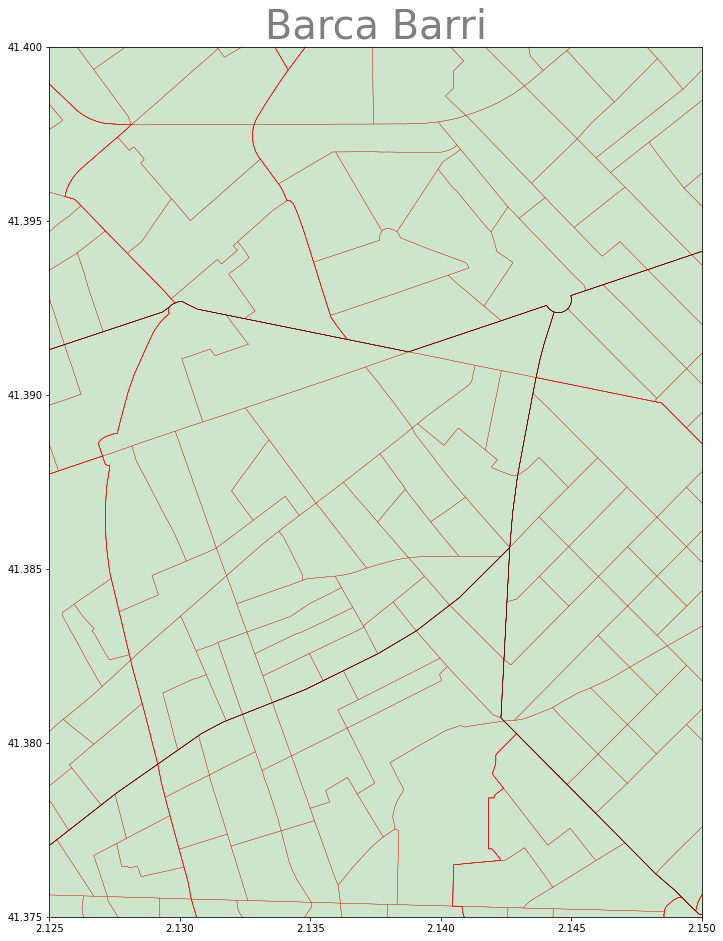

In [7]:
fig, ax = plt.subplots(figsize=(16,16))

fc1 = colorConverter.to_rgba('green', alpha=0.2)
fc2 = colorConverter.to_rgba('green', alpha=0.2)

barcaDFcensal.plot(ax=ax, facecolor = 'none', edgecolor = 'red', linewidth=0.3) 
barcaDFbarris.plot(ax=ax,facecolor = fc1, edgecolor='red', linewidth=0.5) 
barcaDFdistrictes.plot(ax=ax, facecolor = 'none',edgecolor='k', linewidth=0.3) 

#barcaDFbarris.plot(ax=ax, facecolor = 'whitesmoke', edgecolor='darkgrey', linewidth=0.3) 

plt.title("Barca Barri", fontsize=40, color='grey')
plt.xlim(2.125, 2.150)
plt.ylim(41.375, 41.400)
#plt.axis('equal')

plt.show()

<GeoAxesSubplot:>

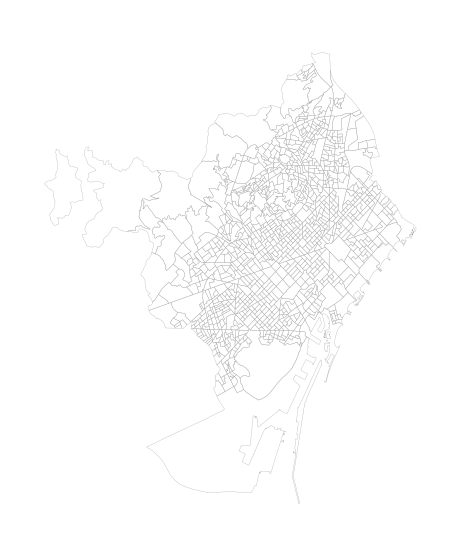

In [8]:
gp.polyplot(barcaDFcensal, projection=gp.crs.AlbersEqualArea(), edgecolor='darkgrey', linewidth=.3,
    figsize=(8, 12))